# Module 4, Session 4: Practical Exercises

**Objective:** To implement the K-Means algorithm using Scikit-learn and to use the Elbow Method to determine the optimal number of clusters.


## Exercise 1: Trace K-Means (Conceptual)

We have the following 2D data points:

- A = (1,1), B = (1,2), C = (2,1), D = (5,4), E = (5,5), F = (6,4)

We want to perform K-Means clustering with k=2.

**Initial centroids:**

- Centroid 1 (C1): (1,1)
- Centroid 2 (C2): (5,4)

**Task:** Trace the first two iterations of K-Means:

1. **Iteration 1**
   - Assignment Step: Assign each point to the closest centroid.
   - Update Step: Recalculate the centroids as the mean of assigned points.

2. **Iteration 2**
   - Assignment Step: Reassign points based on the updated centroids.
   - Update Step: Recalculate centroids again.

**Question:** Did cluster assignments change between Iteration 1 and Iteration 2?


In [1]:
import numpy as np

# Define data points
points = np.array([[1,1], [1,2], [2,1], [5,4], [5,5], [6,4]])
# Initial centroids
centroids = np.array([[1,1], [5,4]])

# Function to assign points to the closest centroid
def assign_clusters(points, centroids):
    clusters = []
    for point in points:
        distances = np.linalg.norm(point - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Function to update centroids
def update_centroids(points, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = points[clusters == i]
        new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)

# Iteration 1
clusters1 = assign_clusters(points, centroids)
centroids1 = update_centroids(points, clusters1, k=2)

# Iteration 2
clusters2 = assign_clusters(points, centroids1)
centroids2 = update_centroids(points, clusters2, k=2)

print("Iteration 1 clusters:", clusters1)
print("Iteration 1 centroids:\n", centroids1)
print("Iteration 2 clusters:", clusters2)
print("Iteration 2 centroids:\n", centroids2)


Iteration 1 clusters: [0 0 0 1 1 1]
Iteration 1 centroids:
 [[1.33333333 1.33333333]
 [5.33333333 4.33333333]]
Iteration 2 clusters: [0 0 0 1 1 1]
Iteration 2 centroids:
 [[1.33333333 1.33333333]
 [5.33333333 4.33333333]]


## Exercise 2: Implement K-Means (Coding)

We will generate a synthetic dataset and perform K-Means clustering.


# Step 1: Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 2: Generate synthetic data with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Visualize raw data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Raw Unlabeled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


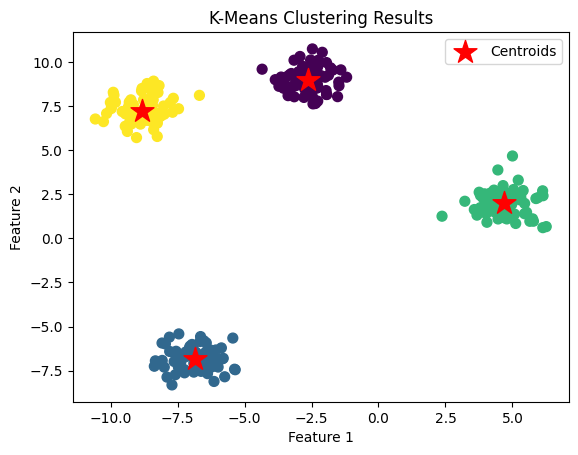

In [3]:
# Step 3: Train the K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Step 4: Visualize clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='red', marker='*', s=300, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Exercise 3: The Elbow Method (Coding)

The Elbow Method helps determine the optimal number of clusters `k`.


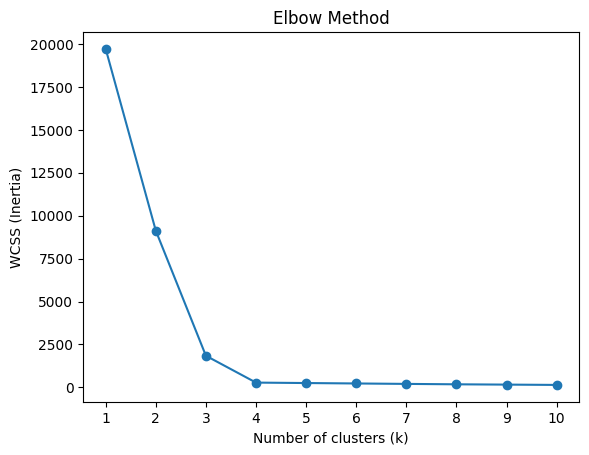

In [4]:
# Step 1: Compute WCSS (Within-Cluster Sum of Squares)
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

# Step 2: Plot WCSS vs number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1,11))
plt.show()


## Exercise 4: The Silhouette Method (Challenge)

The Silhouette Method evaluates the quality of clustering.

**Tasks:**

1. Plot Silhouette scores alongside Elbow Method to compare.
2. Generate new synthetic data with different `cluster_std` values.
3. Apply both Elbow and Silhouette methods to find cases where Elbow is ambiguous but Silhouette is clear.


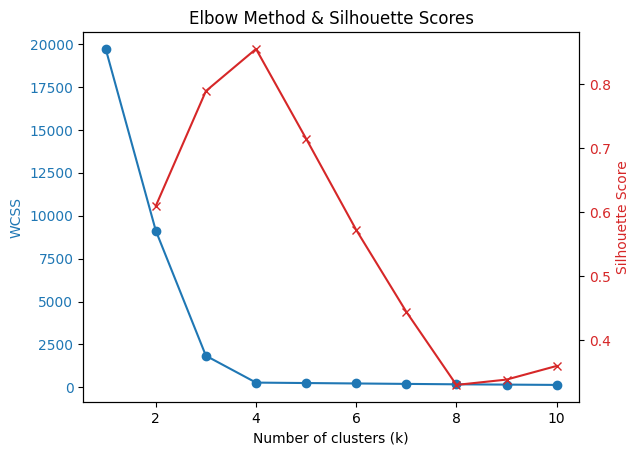

In [5]:
from sklearn.metrics import silhouette_score

# Compute silhouette scores for k = 2 to 10
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Plot WCSS and Silhouette scores together
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(range(1,11), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_range, sil_scores, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method & Silhouette Scores')
plt.show()


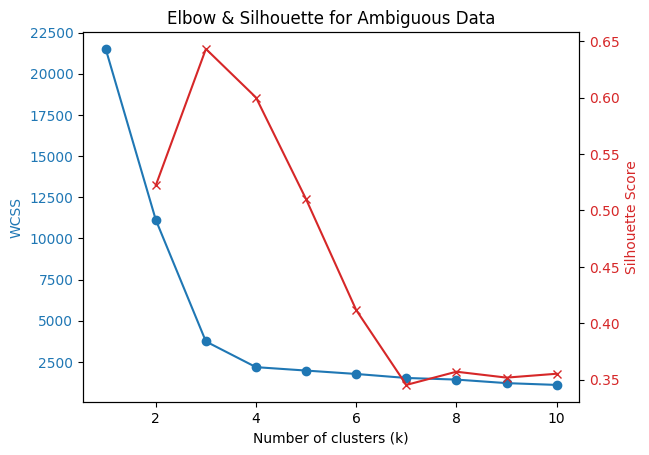

In [6]:
# Step 2: Generate new synthetic data with higher overlap (Elbow ambiguous)
X_new, y_new = make_blobs(n_samples=300, centers=4, cluster_std=2.0, random_state=42)

# Compute WCSS
wcss_new = [KMeans(n_clusters=i, random_state=42).fit(X_new).inertia_ for i in range(1,11)]

# Compute Silhouette scores
sil_scores_new = [silhouette_score(X_new, KMeans(n_clusters=i, random_state=42).fit_predict(X_new)) for i in range(2,11)]

# Plot both metrics
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.plot(range(1,11), wcss_new, marker='o', color=color)
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('WCSS', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(range(2,11), sil_scores_new, marker='x', color=color)
ax2.set_ylabel('Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow & Silhouette for Ambiguous Data')
plt.show()
